<a href="https://colab.research.google.com/github/SebatianUseche/Supervised_Learning-Classification/blob/main/Modelo_clasifcaci%C3%B3n_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formulación de un Modelo de clasifcación

### Caso del negocio:
Sobrevivientes del Titanic, segun varias caracteristicas como embarcación, sexo o año.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

##Se carga el DataSet

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/Python e Inteligencia Artificial/Titanic/train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/Python e Inteligencia Artificial/Titanic/test.csv")
"""
/content/drive/MyDrive/Python e Inteligencia Artificial/Titanic/test.csv
/content/drive/MyDrive/Python e Inteligencia Artificial/Titanic/train.csv
"""

'\n/content/drive/MyDrive/Python e Inteligencia Artificial/Titanic/test.csv\n/content/drive/MyDrive/Python e Inteligencia Artificial/Titanic/train.csv\n'

In [ ]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##Se muestra las columnas deseadas

In [ ]:
data_train.shape #Ver el numero de columas y filas de la base train

(891, 12)

In [ ]:
data_test.shape #Ver el numero de columas y filas de la base test

(418, 11)

In [ ]:
data_train.isnull().sum(axis = 0) #Mirar los valores Nulls entre las columas y hago una suma de ellos, 177 datos sin edad registrada en train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data_test.isnull().sum(axis = 0) #Mirar los valores Nulls entre las columas y hago una suma de ellos, 86 datos sin edad registrada

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##Miro los valores perdidos en Embarcacion

In [ ]:
pd.crosstab(data_train['Embarked'], columns='count') #Cantidad de elementos por Embarked

col_0,count
Embarked,
C,168
Q,77
S,644


In [ ]:
data_train['Embarked'].fillna(value='S',inplace=True) #Al faltar 2 Embarked con valor, le ponemos S al ser el mas grande

In [ ]:
pd.crosstab(data_train['Embarked'], columns='count') #Se evidencia el cambio de +2

col_0,count
Embarked,
C,168
Q,77
S,646


In [ ]:
data_test['Fare'] = data_test.groupby(['Pclass'])['Fare'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)

In [ ]:
data_test.isnull().sum(axis = 0) #Miro los valores Nulls entre las columas y hago una suma de ellos, el fare falten quedo registrada

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
pd.crosstab(data_train['Name'], columns='count')

col_0,count
Name,
"Abbing, Mr. Anthony",1
"Abbott, Mr. Rossmore Edward",1
"Abbott, Mrs. Stanton (Rosa Hunt)",1
"Abelson, Mr. Samuel",1
"Abelson, Mrs. Samuel (Hannah Wizosky)",1
...,...
"de Mulder, Mr. Theodore",1
"de Pelsmaeker, Mr. Alfons",1
"del Carlo, Mr. Sebastiano",1


##Crear una nueva variable para saber los rangos

In [ ]:
#2
Titulos = { "Capt": "Officer",    "Col": "Officer",  "Major": "Officer", "Jonkheer": "Royalty", "Don": "Royalty",  "Sir" : "Royalty",
            "Dr": "Officer",  "Rev": "Officer",  "the Countess":"Royalty",  "Mme": "Mrs",  "Mlle": "Miss",   "Ms": "Mrs",  "Mr" : "Mr",
            "Mrs" : "Mrs",     "Miss" : "Miss",  "Master" : "Master",  "Lady" : "Royalty", "Dona": "Royalty"}

def get_titles(combined):
    # Extraer el titulo del nombre
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Titulos)
    #status('Title')
    return combined

In [ ]:
data_train = get_titles(data_train)
data_test = get_titles(data_test)

In [ ]:
pd.crosstab(data_test['Title'], columns='count')

col_0,count
Title,
Master,21
Miss,78
Mr,240
Mrs,73
Officer,5
Royalty,1


In [ ]:
pd.crosstab(data_train['Title'], columns='count')

col_0,count
Title,
Master,40
Miss,184
Mr,517
Mrs,127
Officer,18
Royalty,5


In [ ]:
pd.crosstab(data_test['Title'], columns='count').sum() #Comprobar que ninguna Fila de Title este vacia

col_0
count    418
dtype: int64

In [ ]:
pd.crosstab(data_train['Title'], columns='count').sum() #Comprobar que ninguna Fila de Title este vacia

col_0
count    891
dtype: int64

## Agrupamos por Sex y Title y a la edad con lamda y Fillna seleccionamos los vacios y los llenamos con la media de las columnas agrupadas

In [ ]:
data_train['Age'] = data_train.groupby(['Sex', 'Title'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
data_test['Age'] = data_test.groupby(['Sex', 'Title'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)

##Vemos que ya no tenemos valores null en Age

In [ ]:
data_test.isnull().sum(axis = 0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [ ]:
data_train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

##Analisis explotaroio de datos y visualizacion

In [ ]:
data_train.groupby(['Pclass'])['Survived'].mean()
#Vemos que en primera clase sobrevivieron el 62%, en seguda 47% y en tercera 24%

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

##Vamos a ver por clases 1, 2 y 3, cual es la equivalencia con respecto al genero

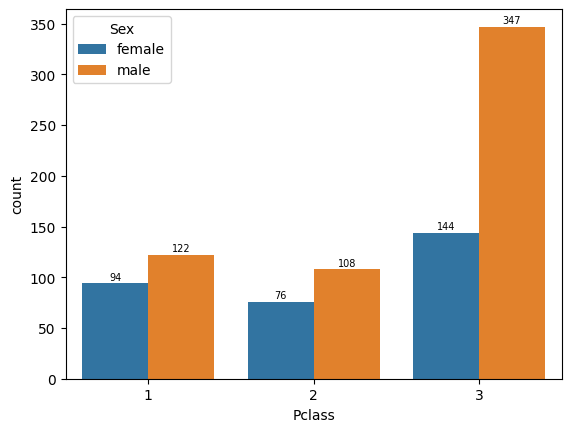

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

figure = sns.countplot(x="Pclass", hue="Sex", data=data_train);

for container in figure.containers:
    figure.bar_label(container, label_type='edge', fontsize=7, color='black', padding=1)  #Se usa para mostrar la etiqueta de datos en el grafico

##Ahora tambien vamos a ver el primedio de sobrevivientes por genero y clase

In [ ]:
data_train.groupby(['Pclass','Sex'])['Survived'].mean()#Vamos que el 96% de mujeres de primera clase sobrevivieron mientras que solo el 36% de los hombre lo hicieron
#Vamos que el 92% de mujeres de segunda clase sobrevivieron mientras que solo el 15% de los hombre lo hicieron
#Vamos que el 50% de mujeres de tercer clase sobrevivieron mientras que solo el 13% de los hombre lo hicieron

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

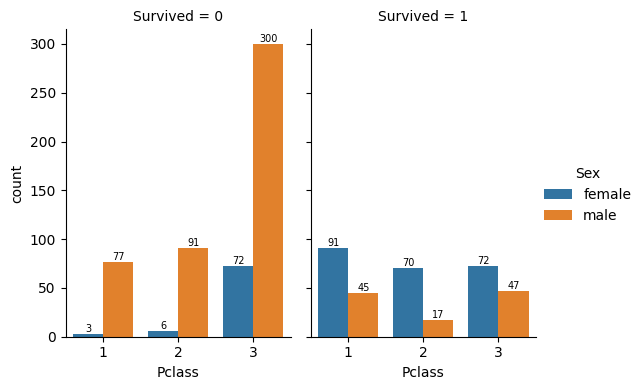

In [ ]:
figure = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=data_train, kind="count",
                height=4, aspect=.7)

for ax in figure.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=7, color='black', xytext=(0, 0),
                        textcoords='offset points')

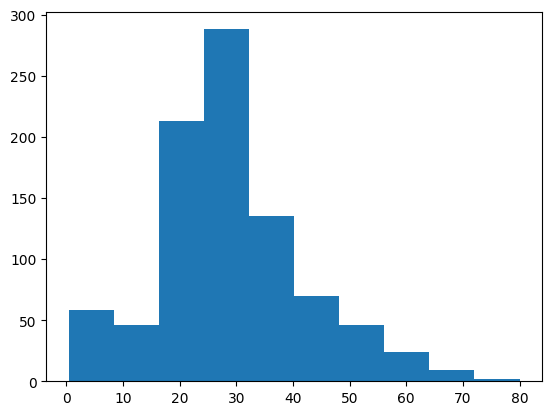

In [ ]:
plt.hist(data_train.Age); #Mirar la edad de las personas

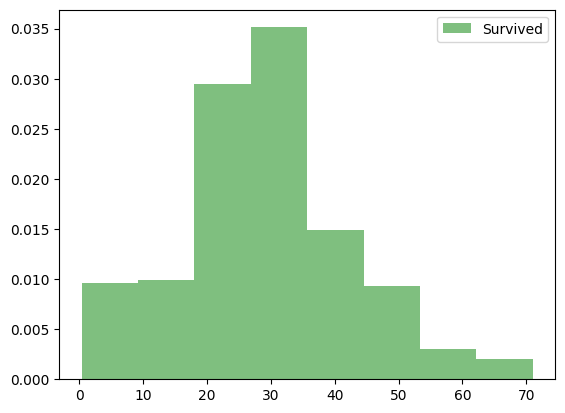

In [ ]:
x1 = data_train.Age[data_train.Survived==1]

# Normalize
kwargs = dict(alpha=0.5, bins=8, density=True, stacked=True)  # 8 bins for 8 groups of age, 0 -10 , 11 - 20, ...

plt.hist(x1, **kwargs, color='g', label='Survived');      # green
plt.legend();

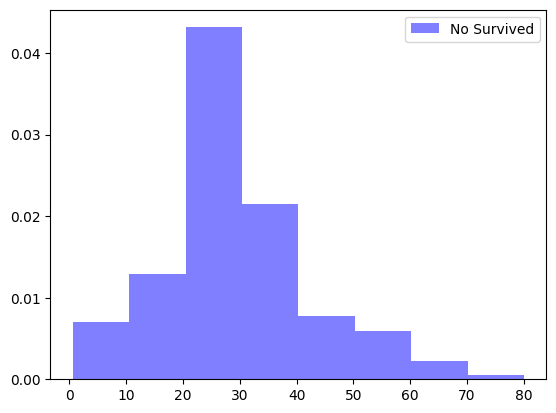

In [ ]:
x2 = data_train[data_train.Survived==0]['Age']

# Normalize
kwargs = dict(alpha=0.5, bins=8, density=True, stacked=True)  # 8 bins for 8 groups of age, 0 -10 , 11 - 20, ...

plt.hist(x2, **kwargs, color='b', label='No Survived');   # blue
plt.legend();

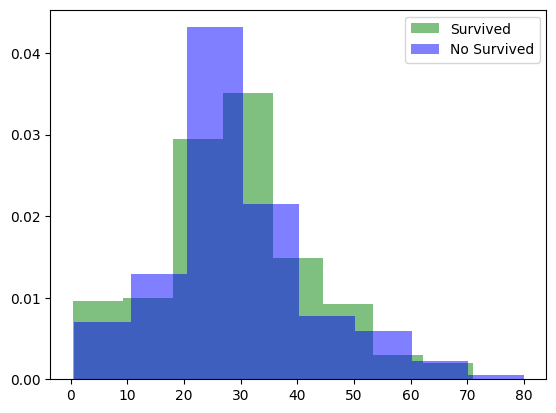

In [ ]:
x1 = data_train.Age[data_train.Survived==1]
x2 = data_train[data_train.Survived==0]['Age']

# Normalize
kwargs = dict(alpha=0.5, bins=8, density=True, stacked=True)  # 8 bins for 8 groups of age, 0 -10 , 11 - 20, ...

plt.hist(x1, **kwargs, color='g', label='Survived');      # green
plt.hist(x2, **kwargs, color='b', label='No Survived');   # blue
plt.legend();

##Hacemos la misma comparacion pero ahora con la tarifa

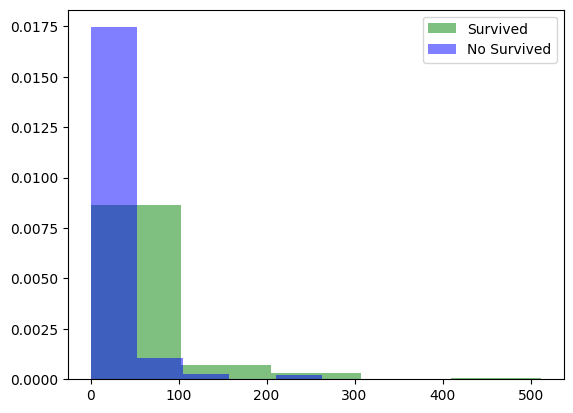

In [ ]:
x1 = data_train.Fare[data_train.Survived==1]
x2 = data_train[data_train.Survived==0]['Fare']  # other way to rewrite

# Normalize
kwargs = dict(alpha=0.5, bins=5, density=True, stacked=True)  # 5 bins for 5 groups of Fare, 0 -50 , 51 - 100, ...

plt.hist(x1, **kwargs, color='g', label='Survived');      # green
plt.hist(x2, **kwargs, color='b', label='No Survived');   # blue
plt.legend();

##Se hace una nueva variable para saber si la persona viene sola o no

In [ ]:
data_train['family']=data_train['SibSp']+data_train['Parch']+1 #Se le suma 1 para saber si esta la personas viene sola
data_test['family']=data_test['SibSp']+data_test['Parch']+1

In [ ]:
data_train.groupby(['family'])['Survived'].mean() #Evidenciamos que las familias entre 2 y 4 son las que mas sobrevivieron

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

##Ahora vamos a ver si las personas que vinieron solas sobrevivieron mas que las personas que estaban acompañadas

In [ ]:
data_train['Alone'] = data_train['family'].apply(lambda x: 1 if x == 1 else 0)
data_test['Alone'] = data_test['family'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
data_train.groupby(['Alone'])['Survived'].mean() #Evidenciamos que el 50% de las personas acompañadas sobrevivieron
#Mientras que el 30% de las personas que venian solas sobrevivieron

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

## Si es mujer ponemos 0 y si es hombre ponemos 1

In [ ]:
data_train['Sex'] = data_train['Sex'].replace(['female','male'],[0,1])
data_test['Sex'] = data_test['Sex'].replace(['female','male'],[0,1])

##Las posibilidades de sobrevivir, son mas grande si es un niño o una mujer

In [ ]:
data_train['WomanOrBoy'] =((data_train.Title <= 'Master') | (data_train.Sex == 0 ))
data_test['WomanOrBoy'] =((data_test.Title == 'Master') | (data_test.Sex == 0 ))

data_train['WomanOrBoy'] = data_train['WomanOrBoy'].replace([False,True],[0,1])
data_test['WomanOrBoy'] = data_test['WomanOrBoy'].replace([False,True],[0,1])

##Tambien se mira si tenia una cabaña o no tenia

In [ ]:
data_train['In_Cabin'] = data_train['Cabin'].apply(lambda x: False if pd.isnull(x) else True )
data_test['In_Cabin'] = data_test['Cabin'].apply(lambda x: False if pd.isnull(x) else True )

data_train['In_Cabin'] = data_train['In_Cabin'].replace([False,True],[0,1])
data_test['In_Cabin'] = data_test['In_Cabin'].replace([False,True],[0,1])

In [ ]:
data_train.groupby(['In_Cabin'])['Survived'].mean() #Evidenciamos que el 66% de las personas que tenian cabaña sobrevivieron
#Mientras que el 29% de las personas que no tenian cabaña sobrevivieron

In_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [ ]:
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,Alone,WomanOrBoy,In_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,26.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,4.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,58.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,14.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1,1
4,5,0,3,"Allen, Mr. William Henry",1,15.0,0,0,373450,8.0500,NaN,S,Mr,1,1,0,0


In [ ]:
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,Alone,WomanOrBoy,In_Cabin
0,892,3,"Kelly, Mr. James",1,30.0,0,0,330911,26.0000,NaN,Q,Mr,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,27.0,1,0,363272,82.2667,NaN,S,Mrs,2,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,22.0,0,0,240276,61.1750,NaN,Q,Mr,1,1,0,0
3,895,3,"Wirz, Mr. Albert",1,22.0,0,0,315154,59.4000,NaN,S,Mr,1,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,21.0,1,1,3101298,31.6833,NaN,S,Mrs,3,0,1,0


##Estandarización y creación de variables ficticias.

In [ ]:
## crear una copia del dataset antes de su manipulacion
Xtrain =  data_train.copy()
Xtest = data_test.copy()

##Se estandarizan las columas de Fare, Age y Family para que tengo un rango de -1 a 1

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scalerFare = StandardScaler()
scalerFare.fit( np.array(Xtrain['Fare']).reshape(-1, 1) )

Xtrain['Fare'] = scalerFare.transform( np.array( Xtrain['Fare']).reshape(-1, 1))
Xtest['Fare'] = scalerFare.transform( np.array( Xtest['Fare']).reshape(-1, 1))

In [ ]:
scaler = StandardScaler()

scaler.fit( np.array(Xtrain['Age']).reshape(-1, 1) )
Xtrain['Age'] = scaler.transform( np.array( Xtrain['Age']).reshape(-1, 1))
Xtest['Age'] = scaler.transform( np.array( Xtest['Age']).reshape(-1, 1))

In [ ]:
scaler = StandardScaler()

scaler.fit( np.array(Xtrain['family']).reshape(-1, 1) )
Xtrain['family'] = scaler.transform( np.array( Xtrain['family']).reshape(-1, 1))
Xtest['family'] = scaler.transform( np.array( Xtest['family']).reshape(-1, 1))

##Se eliminan las columas innecesarias el Xtrain = pd.get_dummies(Xtrain, drop_first=True) lo que hace es que todas las columas que sean String o categoricas, se van a separar en columas individuales, y el true se deja para elimimar la primera, ejemplo: si tenemos una columa es azul, verde o rojo, se elimina la de rojo, ya que si no es azul y no es verde, sera rojo

In [ ]:
Xtrain = Xtrain.drop( columns = ['Name','Ticket','Cabin','PassengerId'],axis =1)
Xtrain = pd.get_dummies(Xtrain, drop_first=True)

Xtest = Xtest.drop( columns = ['Name','Ticket','Cabin','PassengerId'], axis=1)
Xtest = pd.get_dummies(Xtest, drop_first=True)

In [ ]:
Xtrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family,Alone,WomanOrBoy,In_Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,3,1,-0.255926,1,0,-0.502445,0.059160,0,0,0,False,True,False,True,False,False,False
1,1,1,0,-1.914508,1,0,0.786845,0.059160,0,1,1,False,False,False,False,True,False,False
2,1,3,0,2.156557,0,0,-0.488854,-0.560975,1,1,0,False,True,True,False,False,False,False
3,1,1,0,-1.160607,1,0,0.420730,0.059160,0,1,1,False,True,False,False,True,False,False
4,0,3,1,-1.085217,0,0,-0.486337,-0.560975,1,0,0,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.105146,0,0,-0.386671,-0.560975,1,0,0,False,True,False,False,False,True,False
887,1,1,0,-0.180536,0,0,-0.044381,-0.560975,1,1,1,False,True,True,False,False,False,False
888,0,3,0,0.799535,1,2,-0.176263,1.299429,0,1,0,False,True,True,False,False,False,False
889,1,1,1,1.478046,0,0,-0.044381,-0.560975,1,0,1,False,False,False,True,False,False,False


In [ ]:
X= Xtrain.drop(columns='Survived')
y=Xtrain.Survived

In [ ]:
X.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,family,Alone,WomanOrBoy,In_Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
Pclass,1.000000,0.131900,-0.019319,0.083081,0.018443,-0.549500,0.065997,0.135207,-0.094035,-0.725541,0.221009,0.074053,-0.009258,0.142698,-0.154437,-0.148506,-0.117649
Sex,0.131900,1.000000,0.011338,-0.114631,-0.245489,-0.182333,-0.200988,0.303646,-0.908578,-0.140391,-0.074115,0.119224,-0.691548,0.867334,-0.552686,0.089228,-0.007483
Age,-0.019319,0.011338,1.000000,-0.115505,-0.017779,-0.020677,-0.087826,0.073294,-0.044750,0.010116,0.028490,-0.044969,0.015024,0.054297,-0.036233,-0.037350,0.020419
SibSp,0.083081,-0.114631,-0.115505,1.000000,0.414838,0.159651,0.890712,-0.584471,0.259829,-0.040460,-0.026354,0.068734,0.084945,-0.250489,0.059941,-0.024712,-0.008384
Parch,0.018443,-0.245489,-0.017779,0.414838,1.000000,0.216225,0.783111,-0.583398,0.352790,0.036987,-0.081228,0.060814,0.102514,-0.333905,0.221318,-0.048211,-0.035583
Fare,-0.549500,-0.182333,-0.020677,0.159651,0.216225,1.000000,0.217138,-0.271832,0.182620,0.482075,-0.117216,-0.162184,0.120829,-0.183766,0.105665,0.010357,0.015044
family,0.065997,-0.200988,-0.087826,0.890712,0.783111,0.217138,1.000000,-0.690922,0.353832,-0.009175,-0.058592,0.077359,0.109271,-0.338014,0.151534,-0.040975,-0.023507
Alone,0.135207,0.303646,0.073294,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.409431,-0.158029,0.086464,0.029074,-0.050402,0.396920,-0.357826,0.035074,-0.000414
WomanOrBoy,-0.094035,-0.908578,-0.044750,0.259829,0.352790,0.182620,0.353832,-0.409431,1.000000,0.125276,0.076789,-0.106125,0.628326,-0.954606,0.502158,-0.100283,0.000414
In_Cabin,-0.725541,-0.140391,0.010116,-0.040460,0.036987,0.482075,-0.009175,-0.158029,0.125276,1.000000,-0.129572,-0.101139,0.045347,-0.137319,0.121660,0.054658,0.066340


In [ ]:
Xtest.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,family,Alone,WomanOrBoy,In_Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
Pclass,1.000000,0.108615,-0.021791,0.001087,0.018721,-0.010515,0.012736,0.173555,-0.051646,-0.690579,0.252608,0.120783,0.097036,0.076345,-0.227710,-0.113265,-0.073706
Sex,0.108615,1.000000,-0.004873,-0.099943,-0.159120,-0.033816,-0.161803,0.244187,-0.899582,-0.131464,-0.115574,0.105883,-0.633617,0.877762,-0.608514,0.083175,-0.064781
Age,-0.021791,-0.004873,1.000000,-0.013325,0.020694,-0.116448,0.005504,-0.042372,-0.023208,0.031885,0.025739,-0.037159,-0.050104,0.009570,0.057441,0.061617,0.001153
SibSp,0.001087,-0.099943,-0.013325,1.000000,0.306895,0.022459,0.788610,-0.618483,0.225625,0.073067,-0.098824,0.079367,0.055568,-0.228860,0.072758,0.018750,-0.024459
Parch,0.018721,-0.159120,0.020694,0.306895,1.000000,-0.056517,0.827242,-0.495618,0.258283,0.037237,-0.132948,0.092201,0.002488,-0.257458,0.201581,0.000859,-0.019600
Fare,-0.010515,-0.033816,-0.116448,0.022459,-0.056517,1.000000,-0.023256,-0.055210,0.005343,-0.023682,0.036361,-0.050292,-0.004130,0.003319,0.050192,-0.039303,-0.024148
family,0.012736,-0.161803,0.005504,0.788610,0.827242,-0.023256,1.000000,-0.685316,0.300063,0.067192,-0.144233,0.106421,0.034411,-0.301440,0.173188,0.011624,-0.027102
Alone,0.173555,0.244187,-0.042372,-0.618483,-0.495618,-0.055210,-0.685316,1.000000,-0.354866,-0.214414,0.205783,-0.014544,0.035044,0.363630,-0.350445,-0.046206,0.039547
WomanOrBoy,-0.051646,-0.899582,-0.023208,0.225625,0.258283,0.005343,0.300063,-0.354866,1.000000,0.098130,0.092532,-0.098992,0.569991,-0.975743,0.547409,-0.092459,0.058276
In_Cabin,-0.690579,-0.131464,0.031885,0.073067,0.037237,-0.023682,0.067192,-0.214414,0.098130,1.000000,-0.166981,-0.215525,-0.088994,-0.120154,0.245948,0.101928,0.092829


In [ ]:
X.shape  # we have 16 columns  #17

(891, 17)

## En esta parte reduciremos el tamaño de 17 a solo 7 variables

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

#columns =['Pclass', 'Sex', 'Age', 'Fare',
#     'family', 'Title_Miss', 'Title_Mr', 'Title_Mrs']

pca_projected = pca.fit(X)  # train[columns]
train_pca = pca_projected.fit_transform(X) #train[columns]

test_pca = pca_projected.transform(Xtest)

print("variance explained ",pca.explained_variance_ratio_)
print(" singular values: ",pca.singular_values_)

print( X.shape) #train[columns]
print( train_pca.shape)
print( test_pca.shape)

variance explained  [0.369964   0.19473734 0.13598426 0.09553754 0.06286346 0.0512022
 0.02829621]
 singular values:  [48.98368865 35.53827654 29.69723844 24.89194214 20.19160656 18.22283937
 13.54677344]
(891, 17)
(891, 7)
(418, 7)


In [ ]:
from itertools import accumulate
print(list ( accumulate( pca.explained_variance_ratio_) ) )

[0.3699640037443529, 0.5647013394089795, 0.7006855957932883, 0.7962231379610714, 0.8590865933698377, 0.9102887899678618, 0.9385849976282687]


In [ ]:
from sklearn.model_selection import cross_val_score

#Librerias a usar para el analisis predictivo
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(train_pca,y , random_state = 0)

comparison = []

models = [
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs',max_iter=10000),
    SGDClassifier(),
    LinearSVC(max_iter=10000),
    SVC(gamma='auto',max_iter=-1),
    DecisionTreeClassifier(criterion='gini',max_depth=None),
    RandomForestClassifier(n_estimators = 100),
    GradientBoostingClassifier(),
    XGBClassifier()
   ]

for model in models:
    clf = model
    fit = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracyTrain = fit.score(X_train, y_train)
    accuracyTest = fit.score(X_test, y_test)
    scores = cross_val_score(clf, X_train, y_train, cv=5).mean()
    comparison.append( [ str(type(model).__name__),  accuracyTrain, accuracyTest, scores ] )

comparison = pd.DataFrame(comparison)

In [ ]:
comparison.rename(columns={0:'Model',1:'Accuracy Train',
                           2:'Accuracy Test', 3:'Mean Cross Validation'}, inplace=True)
comparison

,Model,Accuracy Train,Accuracy Test,Mean Cross Validation
0,BernoulliNB,0.784431,0.757848,0.778498
1,GaussianNB,0.787425,0.771300,0.778555
2,KNeighborsClassifier,0.857784,0.789238,0.803872
3,LogisticRegression,0.817365,0.784753,0.812950
4,SGDClassifier,0.763473,0.784753,0.775581
5,LinearSVC,0.820359,0.793722,0.815924
6,SVC,0.844311,0.807175,0.833857
7,DecisionTreeClassifier,0.989521,0.762332,0.729009
8,RandomForestClassifier,0.989521,0.789238,0.785827
9,GradientBoostingClassifier,0.928144,0.816143,0.800819


In [ ]:
from sklearn.model_selection import GridSearchCV

rf = SVC(gamma='auto',max_iter=-1)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 1e-3, 1e-4],
                     'C': [0.1, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}]

clf = GridSearchCV(rf, param_grid = tuned_parameters,cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print( clf.best_params_)
print("Best score found on development set:")
print( clf.best_score_)

Best parameters set found on development set:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score found on development set:
0.8368421052631578


In [ ]:
#model.fit(X_train, y_train)
#predictions = model.predict(test_pca)

from sklearn.svm import SVC

# Crear una instancia del clasificador SVC
model = SVC(gamma='auto')

# Ajustar el clasificador a los datos de entrenamiento
model.fit(X_train, y_train)

# Ahora puedes hacer predicciones
predictions = model.predict(test_pca)

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame()
results['PassengerId'] = data_test.reset_index()['PassengerId']
results['Survived'] = predictions
results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Duplicar el DataFrame data_test
data_test_copy = data_test.copy()

# Agregar una nueva columna con los resultados de las predicciones
data_test_copy['Survived'] = predictions

# Mostrar las primeras filas del DataFrame resultante
data_test_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,Alone,WomanOrBoy,In_Cabin,Survived
0,892,3,"Kelly, Mr. James",1,30.0,0,0,330911,26.0000,NaN,Q,Mr,1,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,27.0,1,0,363272,82.2667,NaN,S,Mrs,2,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,22.0,0,0,240276,61.1750,NaN,Q,Mr,1,1,0,0,0
3,895,3,"Wirz, Mr. Albert",1,22.0,0,0,315154,59.4000,NaN,S,Mr,1,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,21.0,1,1,3101298,31.6833,NaN,S,Mrs,3,0,1,0,1


In [ ]:
results.to_csv(r"/content/drive/MyDrive/Python e Inteligencia Artificial/Titanic/Resultados/Titanic_prediccion.csv",index=False)
data_test_copy.to_csv(r"/content/drive/MyDrive/Python e Inteligencia Artificial/Titanic/Resultados/Resultados_test.csv",index=False)